In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import simtk.openmm as mm

In [140]:
system = mm.System()
system.addParticle(1)
force = mm.CustomExternalForce('''
    term1 + term2 + term3 + term4 + z^2;
    term1 = (1 - 0.5*tanh(y - x))*(x + y - 5)^2;
    term2 = 0.2*(((y - x)^2 - 9)^2 + 3*(y - x));
    term3 = 15*exp(-(x-2.5)^2 - (y-2.5)^2);
    term4 = -20*exp(-(x-4)^2 - (y-4)^2);
''')
force.addParticle(0, [])
system.addForce(force)

0

In [165]:
context = mm.Context(system, mm.VariableLangevinIntegrator(20, 1, 0.001), mm.Platform.getPlatformByName('CPU'))
context.setPositions([[0,4,0]])
context.setPositions([[4,0,0]])
context.setVelocitiesToTemperature(5)
print(context.getState(getEnergy=True).getPotentialEnergy())

8.9027144247 kJ/mol


In [169]:
integrator = context.getIntegrator()
trajectory = []
for i in range(1000):
    integrator.step(1000)
    trajectory.append(context.getState(getPositions=True).getPositions(asNumpy=True)._value[0])
print(integrator.getStepSize())

0.0347152377111 ps


(-2, 8)

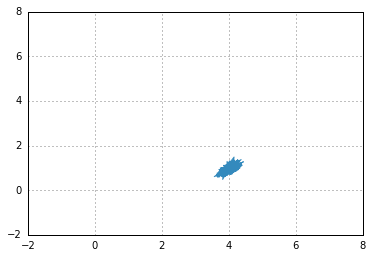

In [170]:
trajectory = np.array(trajectory)
plt.plot(trajectory[:,0], trajectory[:,1])
plt.xlim(-2,8)
plt.ylim(-2,8)

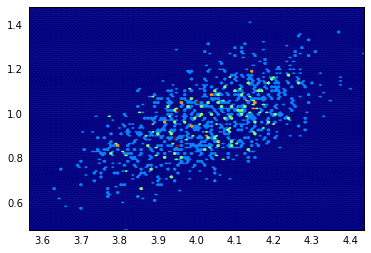

In [171]:
plt.hexbin(trajectory[:,0], trajectory[:,1])